In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [3]:
filelist = [fc.QCD_B_List,fc.NMSSM_MX_700_MY_400]
trees = [ Tree(fnames) for fnames in filelist ]

In [31]:
for tree in trees: tree.calc_btagsum()

In [22]:
select_btagwp = lambda tree,wp : Selection(tree,cuts=dict(btagcut=jet_btagWP[wp]))
selection_btagwps = list(zip(*[[ select_btagwp(tree,wp) for wp in (1,2,3) ] for tree in trees]))

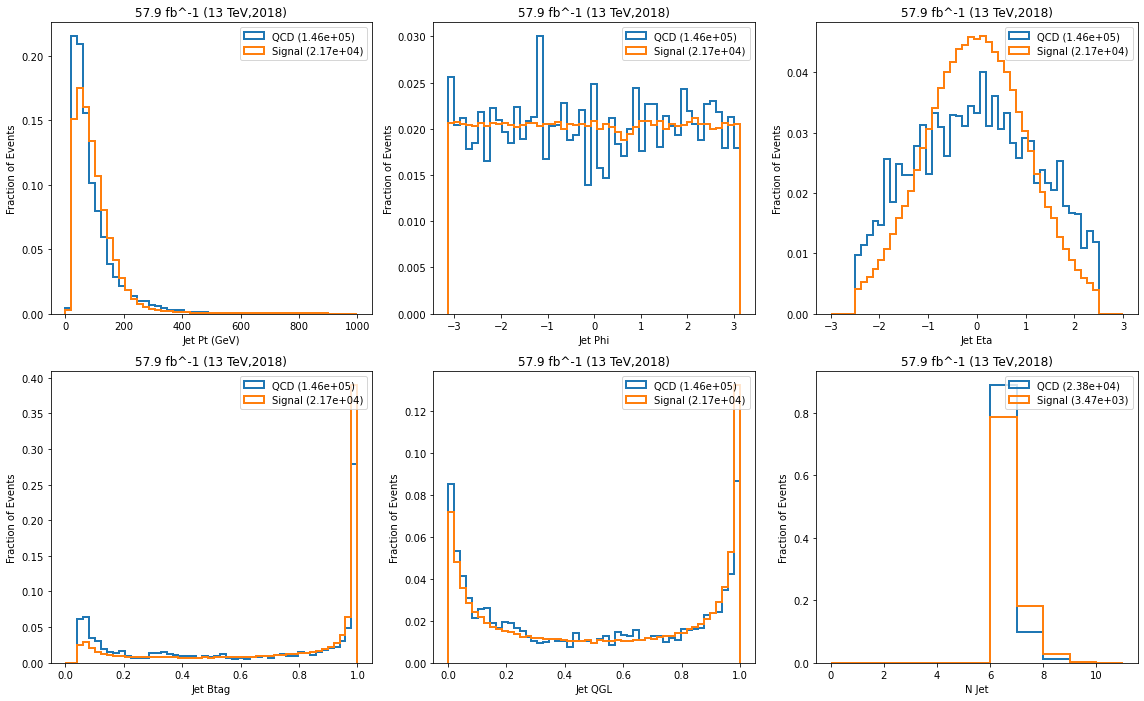

In [24]:
study.jets(trees,density=1)

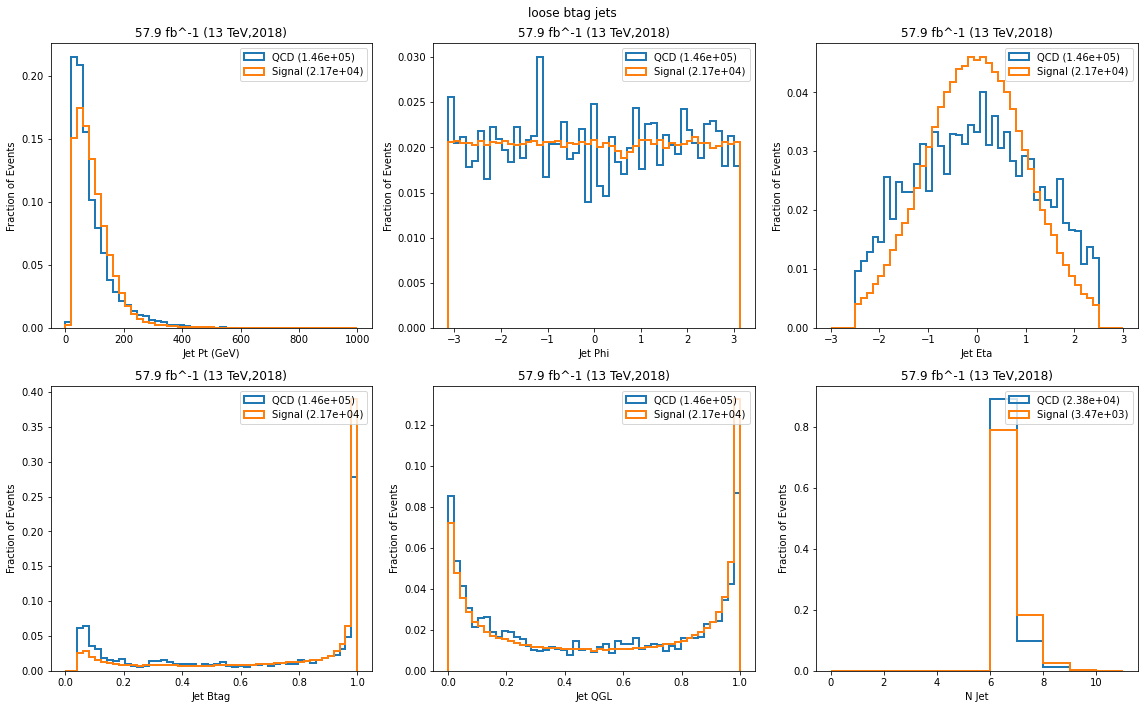

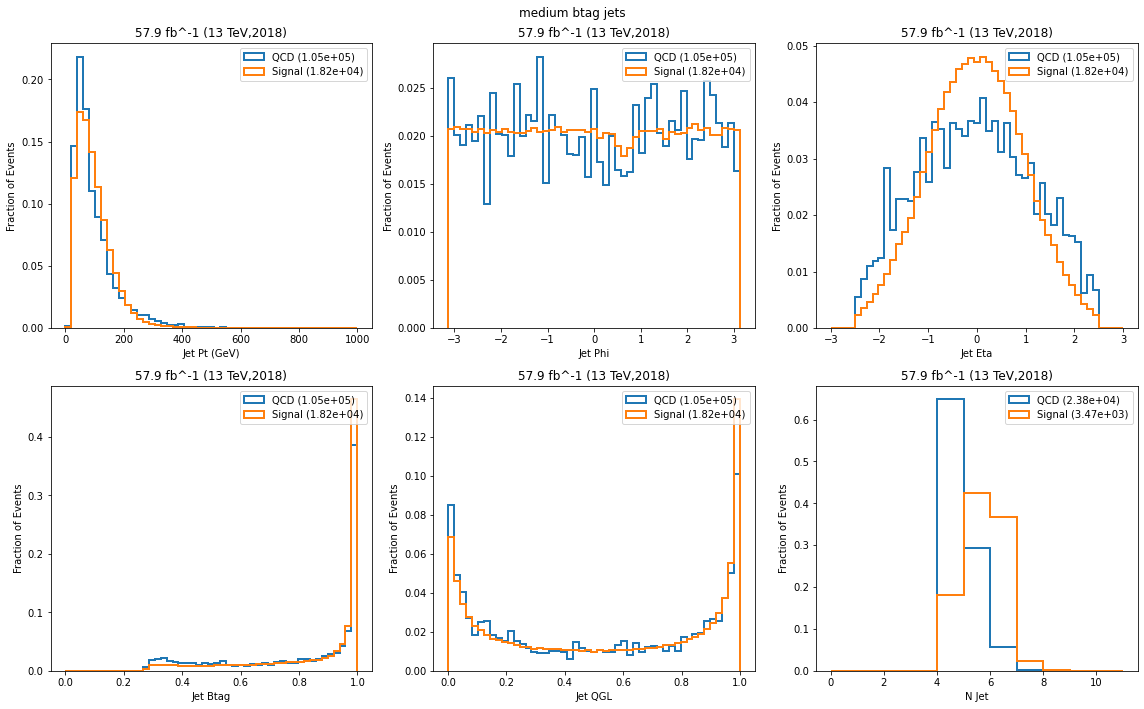

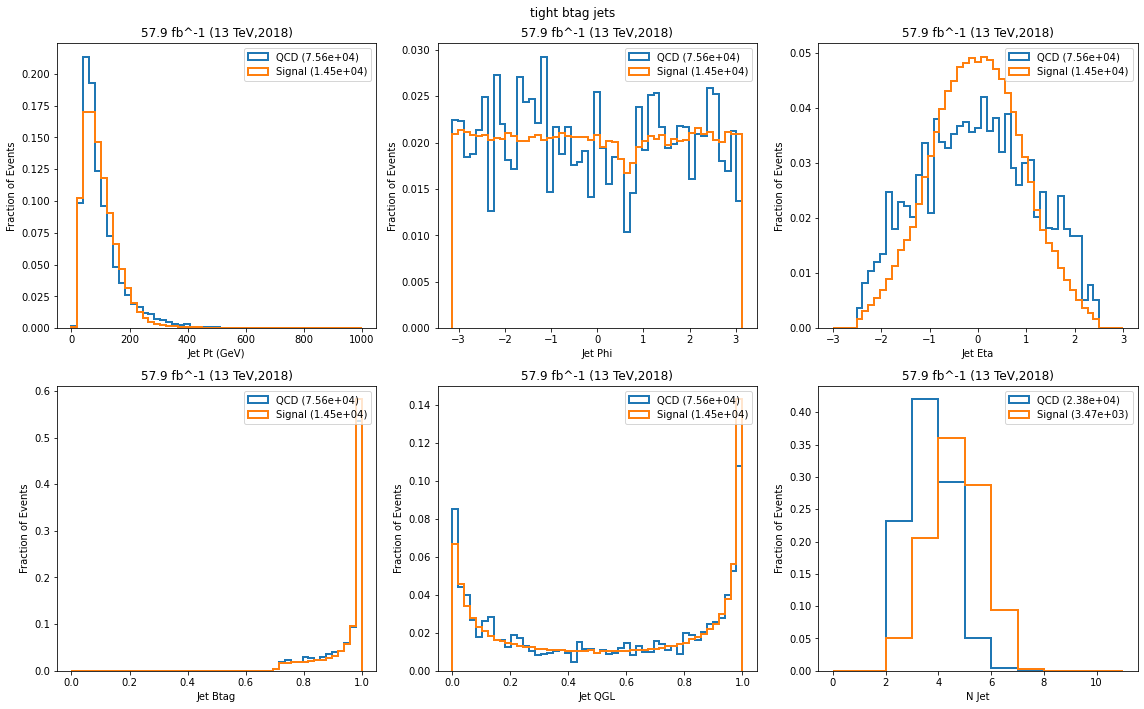

In [25]:
for i,wp in enumerate(selection_btagwps):
    study.jets(wp,density=1,title=f"{wplabels[i+1]} btag jets",saveas=f"{wplabels[i+1]}_btag")

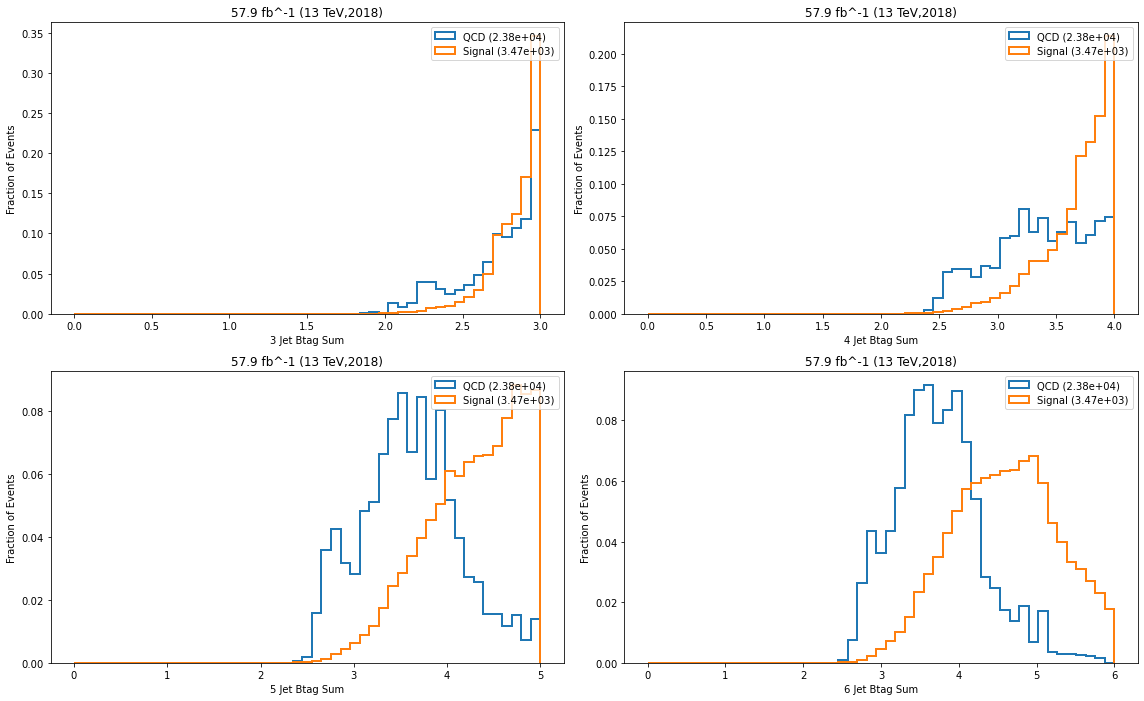

In [27]:
study.njet_var_sum(trees,density=1,saveas="qcd_vs_signal")

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

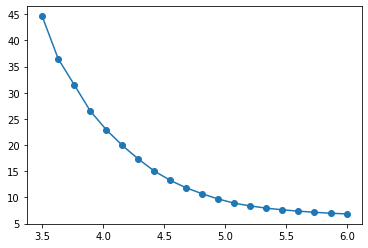

In [39]:
graph_simple(*optimize_var_cut(trees,"jet6_btagsum",varmin=3.5));

In [40]:
n_mbtag_cr = [ Selection(tree,mask=ak.sum(tree["jet_btag"]>jet_btagWP[mediumWP],axis=-1)==4 ) for tree in trees]
btagsum_cr = [ Selection(tree,mask=tree["jet6_btagsum"]<4) for tree in trees ]

In [41]:
print_bovers(n_mbtag_cr)
print_bovers(btagsum_cr)

QCD/Signal: 24.53
--- all QCD ---
Event Efficiency:   0.61
--- all Signal ---
Event Efficiency:   0.18
Selected Purity(6): 0.28
Passed Jet S/T:     0.81
------
QCD/Signal: 23.22
--- all QCD ---
Event Efficiency:   0.67
--- all Signal ---
Event Efficiency:   0.2
Selected Purity(6): 0.30
Passed Jet S/T:     0.82
------


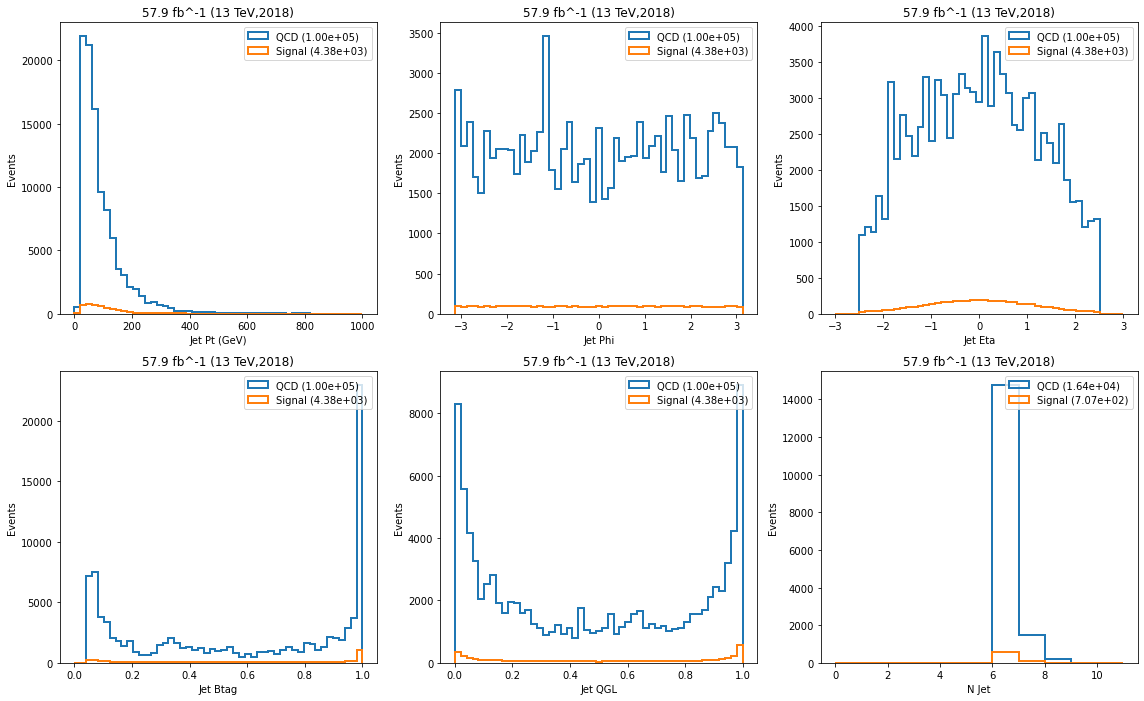

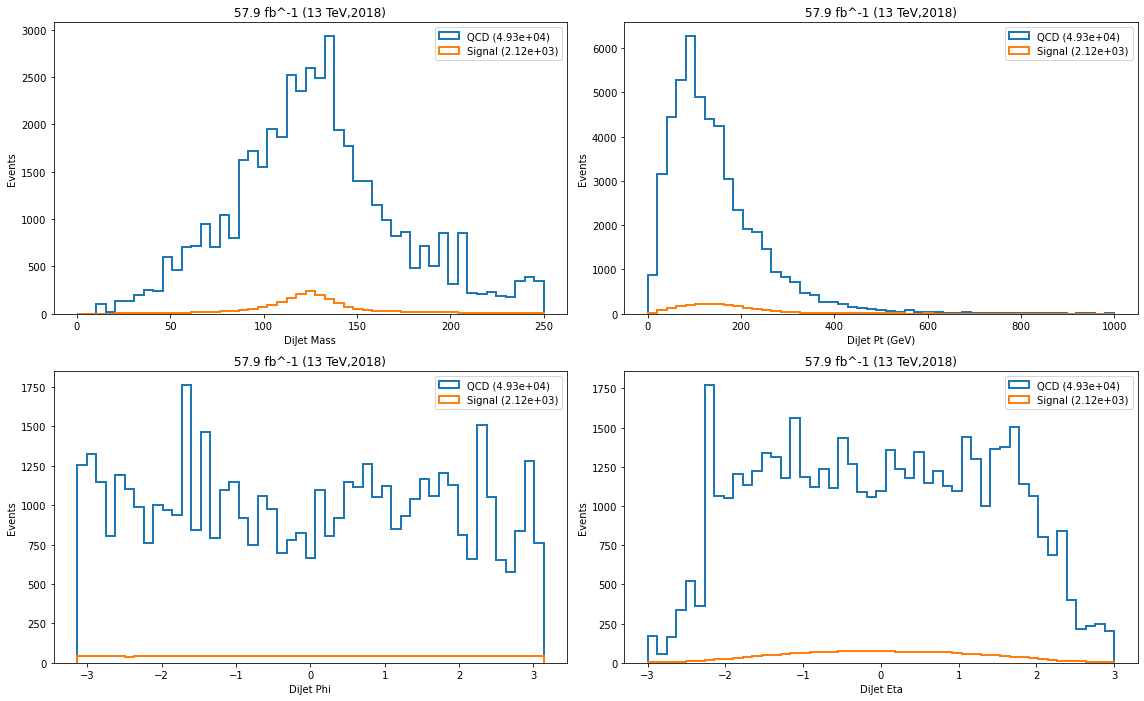

In [42]:
study.jets(btagsum_cr,saveas="btagsum_cr")
study.higgs(btagsum_cr,saveas="btagsum_cr")